In [188]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Vragen

1. Noem een voorbeeld uit de praktijk waarin jullie algoritme wordt gebruikt.
Het Random forest model wordt gebruikt in de Finaciele sector voor fraudedetecite. Het kan patronen identificeren die wijzen op verdachte activiteiten, zoals ongebruikelijke transacties of creditcardfraude. 

2. Hoe werkt het algoritme conceptueel? Wat zijn de belangrijkste stappen?
- Bootstrapping:
Maakt willekeurige subsets van de trainingsgegevens door exemplaren met vervanging te selecteren.
- Kenmerkselectie:
Selecteerd willekeurige kenmerken bij elke knoop in elke boom om overfitting te verminderen.
- Opbouwen van Beslissingsbomen:
Trained beslissingsbomen op de subsets van gegevens en kenmerken.
- Voorspellingen van Elke Boom:
Gebruikt elke boom om voorspellingen te doen op nieuwe gegevens.
- Aggregatie van Voorspellingen:
Combineert de voorspellingen van alle bomen om de uiteindelijke voorspelling van het Random Forest te verkrijgen, bijvoorbeeld door het nemen van gemiddelden (voor regressie) of meerderheid (voor classificatie).

3. Wat zijn de voor- en nadelen van jullie algoritme? In welke situaties werkt het heel
goed en wanneer juist niet?

Voordelen:
- Random Forest heeft vaak een hoge voorspellende nauwkeurigheid, zelfs zonder veel afstemming van hyperparameters.
- Door het gebruik van meerdere bomen en bootstrapping is Random Forest robuust tegen overfitting, overfitting gebeurt snel bij kleine datasets, wat bij ons het geval is.

Nadelen:
- Het maken van voorspellingen kan relatief lang duren, vooral bij grote aantallen bomen en kenmerken.

Wanneer werkt Random forest wel goed:
- Random Forest werkt goed bij complexe taken waarin er veel interacties en niet-lineaire relaties tussen kenmerken zijn.

Wanneer werkt Random forest niet goed:
- Als snelle voorspellingen cruciaal zijn, kan Random Forest minder geschikt zijn vanwege de combinatie van resultaten over meerdere bomen.


In [189]:
# Hier wordt het bestand ingeladen en wordt de naam 'data' gegeven.
data = pd.read_csv('./data/classification/data.csv')

## Verkenende analyse

In [190]:
# Hier word gekeken hoe het dataframe eruit ziet
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [191]:
# Hier wordt gekeken welke kolommen er allemaal in de dataframe staan
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [192]:
# Wat is het type van de data in het dataframe?
# Als het dataframe een kolom heeft met veel Nan waarden of missing values dan kan deze kolom gedropt worden of dan moeten deze waarden ingevuld worden.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [193]:
# Zitten er nan values in het dataframe?
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [194]:
# In deze tabel kan gezien worden dat alle minimale waarden positief zijn. Dit is goed want er kan bijvoorbeeld geen negatieve omtrek zijn.
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [196]:
# Unnamed 32 is een kolom met alleen maar nan waardes, deze is dus niet nodig
# Daarnaast is id geen kenmerk of het goedaardig of kwaadaardig is, maar een naam. Deze kan dus ook gedropt worden.
data.drop(columns = ['Unnamed: 32', 'id'], inplace= True)


In [197]:
# M = malignant (kwaadaardig) B = begnin (goedaardig)
# Wat is ongeveer de verhoding van goedaardig en kwaadaardig
print(data.diagnosis.value_counts())
data.diagnosis.value_counts(normalize = True)

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

In [198]:
# voor machine learning moet alles een numerieke waarde zijn, dus kwaadaardig = 1 goedaardig  = 0
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})

### In de Boxplots hieronder kan gezien worden dat er bij sommige kolommen uitschieters zijn. Deze zijn echter vaak niet alleen, hierdoor nemen wij aan dat dit geen meetfouten zijn en dat het model hiervan kan leren. 

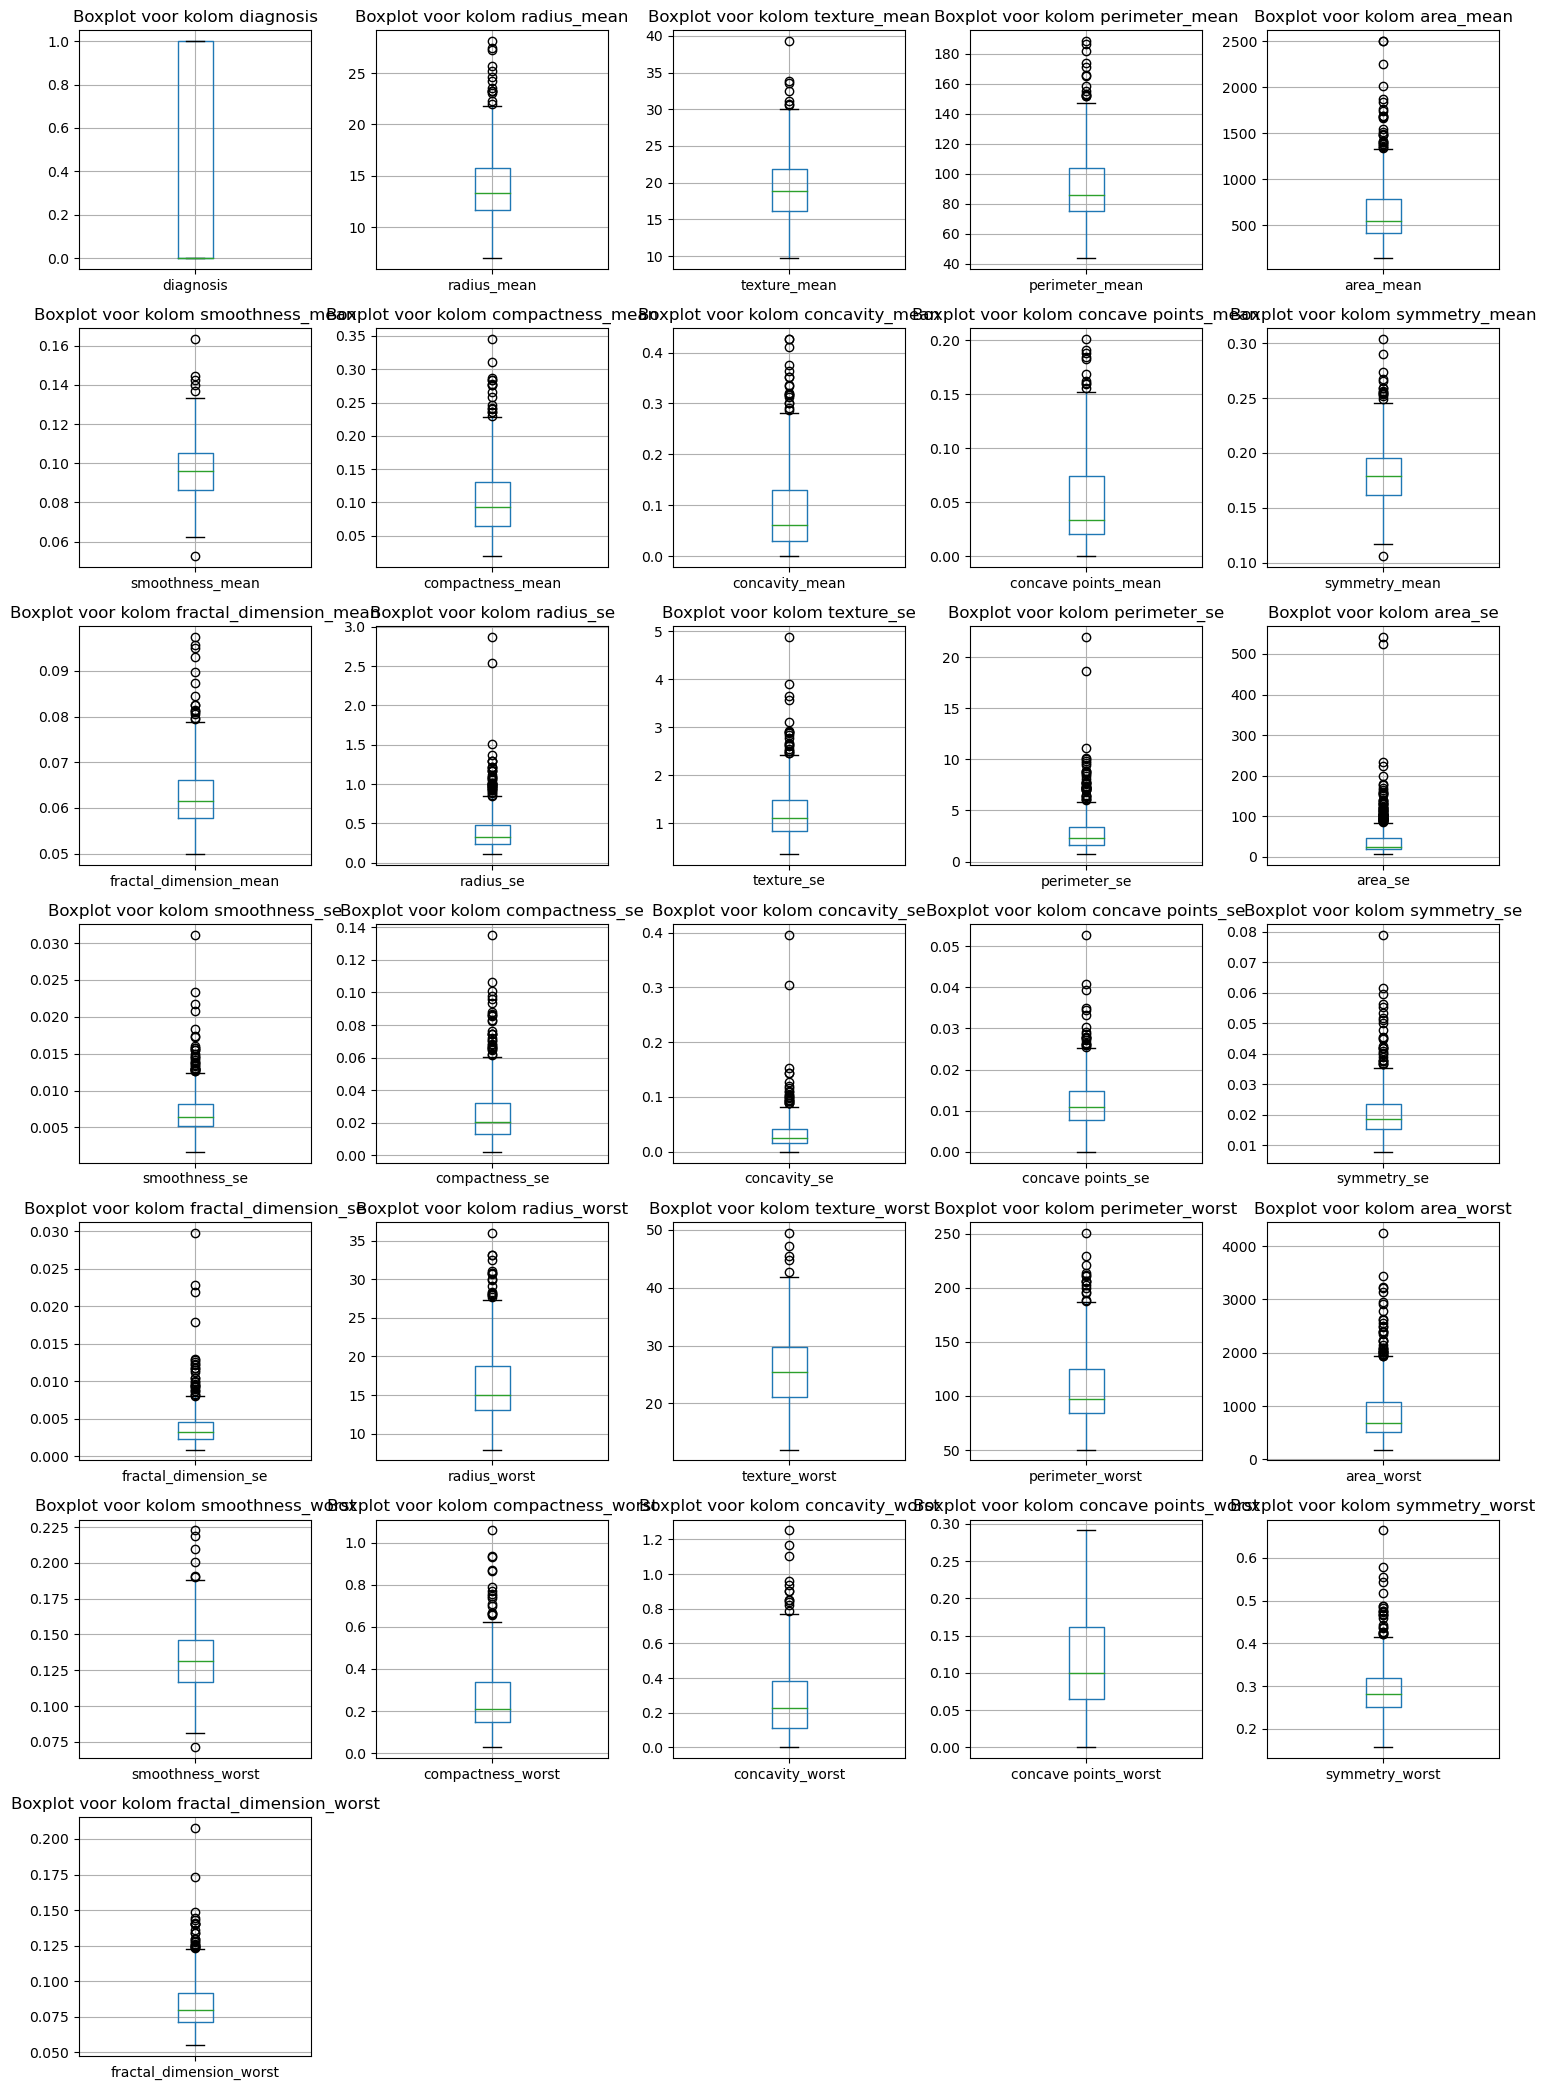

In [199]:
aantal_kolommen = len(data.columns)
aantal_kolommen_per_rij = 5
aantal_rijen = -(-aantal_kolommen // aantal_kolommen_per_rij)  # Afgeronde deling om ervoor te zorgen dat alle kolommen worden gedekt

# Genereer boxplots in een rij van 4
fig, axs = plt.subplots(aantal_rijen, aantal_kolommen_per_rij, figsize=(15, 3*aantal_rijen))

# Flatten de axs array als het meer dan één rij heeft
axs = axs.flatten()

for i, column in enumerate(data.columns):
    plt.sca(axs[i])
    data.boxplot(column=column)
    plt.title(f'Boxplot voor kolom {column}')

# Verwijder ongebruikte subplots als het aantal kolommen niet een veelvoud van 4 is
for j in range(i+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [200]:
# De correlatie maken tussen de verschillende kolommen
corr = data.corr()

In [201]:
# Hier kan gezien worden welke kolommen de hoogste correlatie hebben met de diagnose 
# Het spreekt voor zich dat de kolom diagnosis precies een correlatie heeft van 1, 
# concave points_worst heeft dus de hoogste correlatie
corr['diagnosis'].sort_values(ascending = False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [202]:
# Het maken van een heatmap zodat er overzichtelijk gezien kan worden welke variablen een correlatie met elkaar hebben
px.imshow(corr)

<Axes: xlabel='concave points_worst', ylabel='diagnosis'>

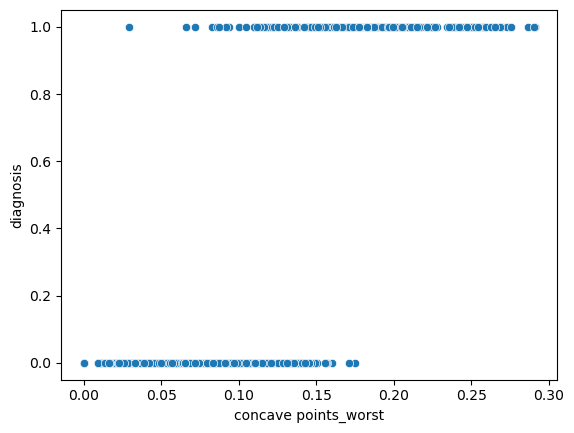

In [203]:
# spreiding van de meest gecoreleerde variable met diagnosis,
# Hier kan al een beetje gezien worden dat als de concave points_worst >0.20 is dat het altijd kwaadaardig is
sns.scatterplot(data, x = 'concave points_worst', y = 'diagnosis')

# Het classificatie model

Voor het classifiseren van borstkanker is de accuratiteit belangrijker dan de snelheid van het model.
Daarnaast is het geen grote dataset dus in overfitting een gevaar. Hierdoor gebruiken wij het randomforest calssifatie model.

## De code met 1 variabele

In [206]:
# Hier wordt de y (wat moet er voorspeld worden) en de x (de features(met wat wordt de y voorspeld))- 
# - bepaald. De y = de diagnose en de x = concave points_worst (de variabble met de hoogste correlatie)
# Bij X wordt .reshape(-1, 1) gebruikt. Hiermee moet python zelf de vorm van de array bepalen.
#X = data.drop('diagnosis', axis=1)  
X = np.array(data['concave points_worst']).reshape(-1,1)

y = np.array(data['diagnosis'])


In [207]:
# De data set aan het verdelen tussen een trai
# In dataset en een test dataset,
# hier wordt 20% de test dataset zodat de dataset niet overgefit wordt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [208]:

# Hier wordt een instantie van het random forest classifier model gemaakt.
# Hier zouden ook verschillen Hyperparameters ingesteld kunnen worden,
# echter zijn de standaard instellingen vaak een goed uitgangspunt.

rf_model = RandomForestClassifier(random_state=42)


In [209]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [210]:
# Hier wordt er met het getrainde model de waarden voorspeld op de test data
predictions = rf_model.predict(X_test)

In [211]:

# Hier wordt de nauwkeurigheid berekend
accuracy = accuracy_score(y_test, predictions)
print(f"Nauwkeurigheid: {accuracy}")

# Andere evaluatiemetingen, zoals de precisie en de f1score
# Daarnaast wordt ook een matrix laten zien waar de voorspellingen goed zijn of fout zijn.
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


Nauwkeurigheid: 0.847953216374269
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       108
           1       0.78      0.81      0.80        63

    accuracy                           0.85       171
   macro avg       0.84      0.84      0.84       171
weighted avg       0.85      0.85      0.85       171

[[94 14]
 [12 51]]


##### Met 1 variabele is het model dus ongeveer 84% van de keren correct. Dit is best hoog, echter is dit ook de variabele die die hoogste correlatie heeft met de diagnose. Deze nauwkeurigheid is dus wel realistisch.

## De code met meerde variabelen

##### Hieronder is een stuk code geschreven om variabelen toe te voegen bij de X. Het stoppen van het toevoegen van variabelen stopt als de nauwkeurigheid niet meer hoger wordt.

In [214]:
# De variable die wij willen voorspellen, dus de diagnose
y2 = data["diagnosis"]

# Hier wordt een lege lijst aangemaakt om de nauwkeurigheid van de verschillende combinaties te onthouden
accuracy_list = []


# We beginnn met de hoogst gecorreleerde kolom omdat dit ook de variabele is die we hebben gebruikt voor het model met maar 1 waarde. 
selected_columns = data.corr()["diagnosis"].sort_values(ascending=False).index[1:2].tolist()

# Print de geselecteerde kolommen om te controleren of ze overeenkomen met je verwachtingen
print("Selected Columns:", selected_columns)

# Hier wordt de beste combinaties van kolommen en de nauwkeurigheid van deze kolommen bijgehouden. 
# Deze waarden kunnen later geprint worden zodat dit in een duidelijke conclusie zal komen.
best_columns = selected_columns
best_accuracy = 0.0

# Hier wordt de tolerantie aangemaakt. De tolerantie is hier 0.001, dus wanneer het model minder dan 0.001 beter wordt, 
# of slechter wordt stopt het model.
tolerance = 0.001  

# Hier wordt een loop gemaakt die doorgaat totdat de nauwkeurigheid niet meer hoger wordt
while True:
    # Hier wordt de volgende best presterende kolom toegevoegd aan de kolommen die al meegenomen worden.
    best_performing_column = None
    best_performing_accuracy = 0.0

    # Itereer over de kolommen die niet in de geselecteerde kolommen zitten
    for column in data.columns.difference(["diagnosis"] + selected_columns):
        current_columns = selected_columns + [column]
        X2 = data[current_columns]

        # Hier wordt de data in een train en een test dataset gesplits. De test grote is 30% van de totale dataset.
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

        # hier wordt het model aangemaakt en wordt het getraind.
        rf_model = RandomForestClassifier(random_state=42)
        rf_model.fit(X2_train, y2_train)

        # Hier worden de voorspellingen op de test dataste gedaan
        # Met deze voorspellingen kan ook de nauwkeurigheid berekend worden
        predictions = rf_model.predict(X2_test)

        # Hier wordt de Nauwkeurigheid berekend
        # Op basis van deze nauwkeurigheid wordt er gekeken of het aantal variabelen zich verder uitbreid, 
        # of dat dit de optimale combinatie is van variabelen.
        current_accuracy = accuracy_score(y2_test, predictions)

        # Hier wordt een if statement gemaakt om te kijken of de kolom beter presteerd dan de vorige kolom.
        if current_accuracy > best_performing_accuracy:
            best_performing_accuracy = current_accuracy
            best_performing_column = column

    # Hier wordt berekend of de toevoeging van een nieuwe kolom de nauwkeurigheid heeft verbeterd van het model.
    if best_performing_column is not None:
        selected_columns.append(best_performing_column)
        accuracy_list.append(best_performing_accuracy)
        print(f"Model met {len(selected_columns)} kolommen: {selected_columns}, Nauwkeurigheid: {best_performing_accuracy}")

        # Hier wordt de beste combinatie van kolommen veranderd als de huidige nauwkeurigheid beter is
        if best_performing_accuracy > best_accuracy:
            best_accuracy = best_performing_accuracy
            best_columns = selected_columns
        else:
            # Als de nauwkeurigheid minder verbeterd dan wat de tolerantie toelaat wordt de loop verbroken en is dit de beste combinatie van variabelen.
            if best_accuracy - best_performing_accuracy < tolerance:
                break
    else:
        # Als er helemaal geen verbetering in de nauwkeurigheid wordt gezien wordt de loop ook verbroken.
        break

# Hier worden de uiteindelijke resulaten geprint zodat dit gezien kan worden.
print(f"\nUiteindelijk geselecteerde kolommen: {best_columns}, Nauwkeurigheid: {best_accuracy}")


Selected Columns: ['concave points_worst']
Model met 2 kolommen: ['concave points_worst', 'area_worst'], Nauwkeurigheid: 0.9532163742690059
Model met 3 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst'], Nauwkeurigheid: 0.9649122807017544
Model met 4 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst', 'area_mean'], Nauwkeurigheid: 0.9707602339181286
Model met 5 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst', 'area_mean', 'fractal_dimension_worst'], Nauwkeurigheid: 0.9766081871345029
Model met 6 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst', 'area_mean', 'fractal_dimension_worst', 'concave points_mean'], Nauwkeurigheid: 0.9707602339181286
Model met 7 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst', 'area_mean', 'fractal_dimension_worst', 'concave points_mean', 'area_se'], Nauwkeurigheid: 0.9707602339181286
Model met 8 kolommen: ['concave points_worst', 'area_worst', 'smoothness_worst', 'are

##### Wat hier opvalt is dat de nauwkeurigheid met 5 kolommen en met 11 kolommen hetzelfde is, namelijk 0.9766081871345029. De combinatie van kolommen die wij kiezen zijn de 11 kolommen. Dit omdat het model dan betrouwbaarder wordt omdat er meer kolommen worden meegenomen, terwijl het model niet overgefit wordt op deze dataset omdat de totale dataset 30 kolommen bevat. Wat ons ook opvalt is dat de kolommen ook niet op volgorde van correlatie zijn die wij hebben gevonden bij de data verkenning, zie de code hieronder als herinnering. Dit is voor ons een verassing dus hebben wij gekeken of de top 5 variabelen met de hoogste correlatie een betere nauwkeurigheid krijgen dan de 5 die een nauwkeurigheid hebben gekregen van 0.9766081871345029.

In [217]:
data.corr()["diagnosis"].sort_values(ascending=False).head(10)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64

In [216]:

# Dit zijn de 5 kollommen met de hoogste correlatie tot de diagnose
selected_columns = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'diagnosis']
data_selected = data[selected_columns]

# Hier wordt de dataset met de 5 kolommen gesplitst in test en train dataset
X3 = data_selected.drop('diagnosis', axis=1)
y3 = data_selected['diagnosis']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

# Hier wordt het random forest classifier model geinitieerd en wordt de random state op 42 gezet zodat de uitkomst opnieuw gebruikt kan worden
# Daarnaast wordt het model ook getrained
clf = RandomForestClassifier( random_state=42)
clf.fit(X3_train, y3_train)

# Hier wordt de diagnose voorspeld. Aan de hand van deze voorspelling kan er gekeken worden hoe accuraat het model is
y3_pred = clf.predict(X3_test)

# Hier wordt de nauwkeurigheid berekend, met wat het daadwerkelijk is en wat er voorspeld is.
accuracy = accuracy_score(y3_test, y3_pred)
print(f'Nauwkeurigheid: {accuracy}')

# In het classificatie rapport kan de kwaliteit van het omdel beter bekeken worden doormiddel van de precicie recall en de f1-score.
print('Classificatierapport:')
print(classification_report(y3_test, y3_pred))

# In de verwarringsmatrix kan gezien worden waar de fouten en goede voorspellingen zitten. dus waar het goedaardig voorspeld is maar waar het kwaadaardig is.
# Waar het goedaardig voorspeld is en waar het goedaardig is. 
print('Verwarringsmatrix:')
print(confusion_matrix(y3_test, y3_pred))


Nauwkeurigheid: 0.9532163742690059
Classificatierapport:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       108
           1       0.95      0.92      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Verwarringsmatrix:
[[105   3]
 [  5  58]]


##### De combinatie van deze 5 kolommen geeft dus een nauwkeurigheid van 0.9532163742690059. Dit is lager dat de combinatie van 5 kolommen die wij hiervoor hebben gevonden.

##### De kolommen waarmee het model uiteindelijk het beste werkt zijn dus: 'concave points_worst', 'area_worst', 'smoothness_worst', 'area_mean', 'fractal_dimension_worst', 'concave points_mean', 'area_se', 'compactness_se', 'radius_se', 'concave points_se', 'symmetry_worst'. Deze kolommen geven dus een nauwkeurigheid van 0.9766081871345029.